<a href="https://colab.research.google.com/github/IMI1998/Heart-Attack-Risk-Prediction-hyper-params-Automl-/blob/main/Heart_Attack_Risk_Prediction_(hyper_params_%26_Automl).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [146]:
df = pd.read_csv("/content/heart.csv")
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [147]:
df = df.drop(['oldpeak' , 'slp' ,'thall' ] , axis=1)
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
0,63,1,3,145,233,1,0,150,0,0,1
1,37,1,2,130,250,0,1,187,0,0,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,0,1
4,57,0,0,120,354,0,1,163,1,0,1


In [148]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exng,0
caa,0


In [149]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.276326,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.118261,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.181053,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.101389,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.070511,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.137979,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.072042,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.213177,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.115739,-0.436757
caa,0.276326,0.118261,-0.181053,0.101389,0.070511,0.137979,-0.072042,-0.213177,0.115739,1.000000,-0.391724


<Axes: >

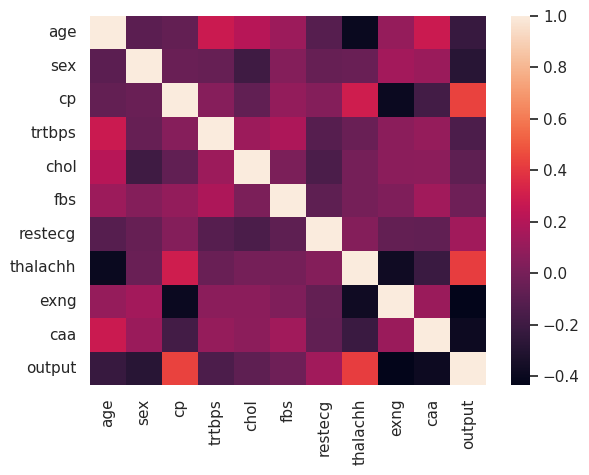

In [150]:
sns.heatmap(df.corr())

<Axes: title={'center': 'Age of patients'}, xlabel='Age', ylabel='count'>

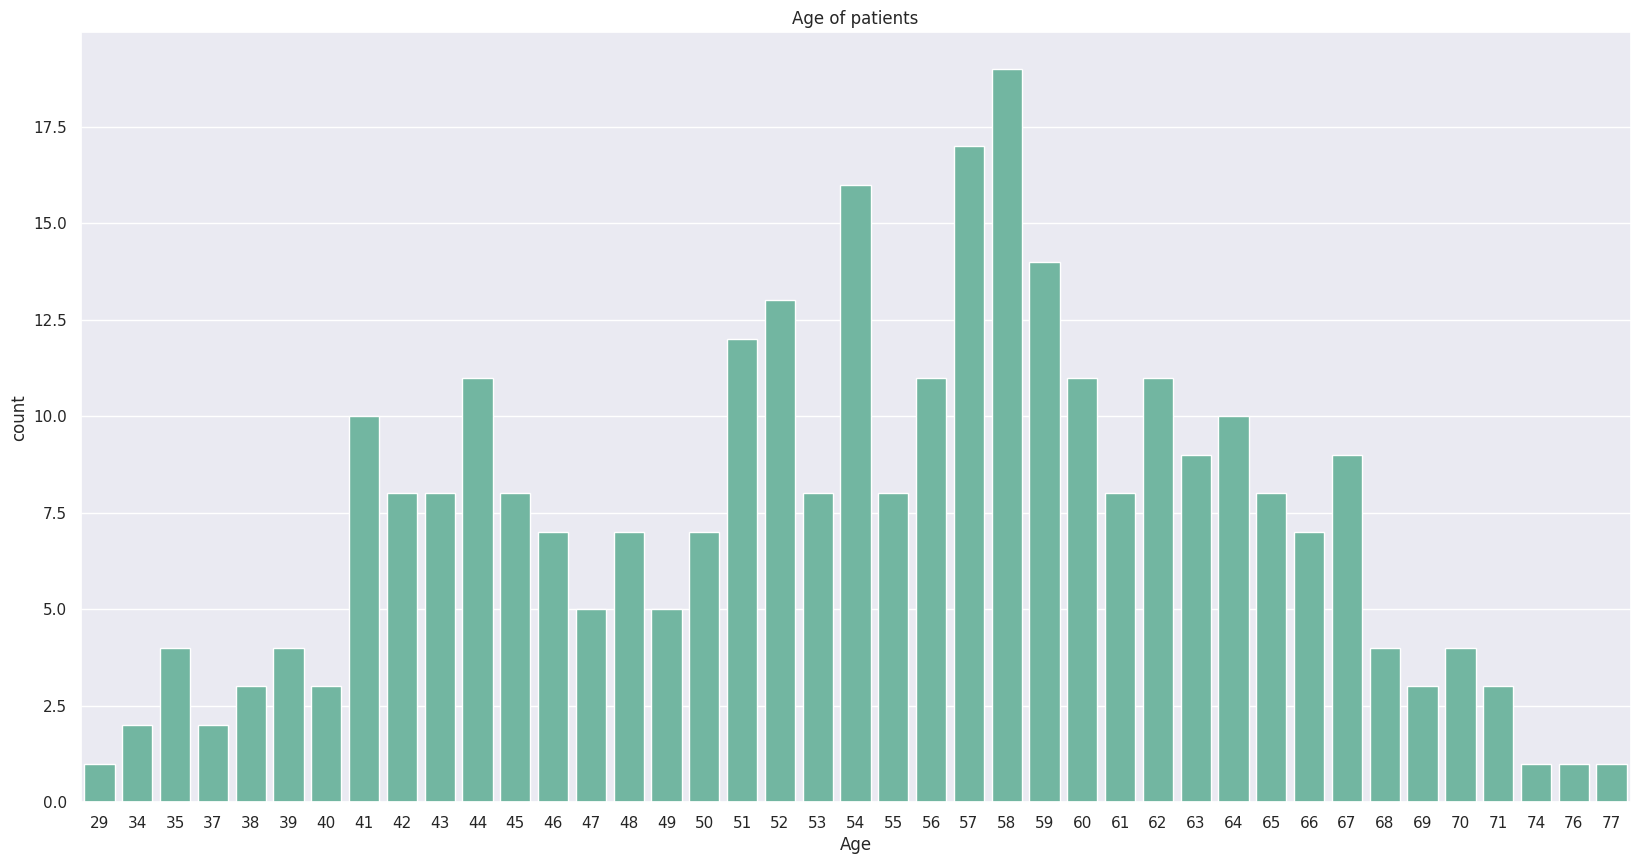

In [151]:
plt.figure(figsize=(20,10))
plt.title("Age of patients")
plt.xlabel("Age")
sns.countplot(x='age' , data = df )

<Axes: title={'center': 'sex of Patients , 0=Femaile and 1=Male'}, xlabel='sex', ylabel='count'>

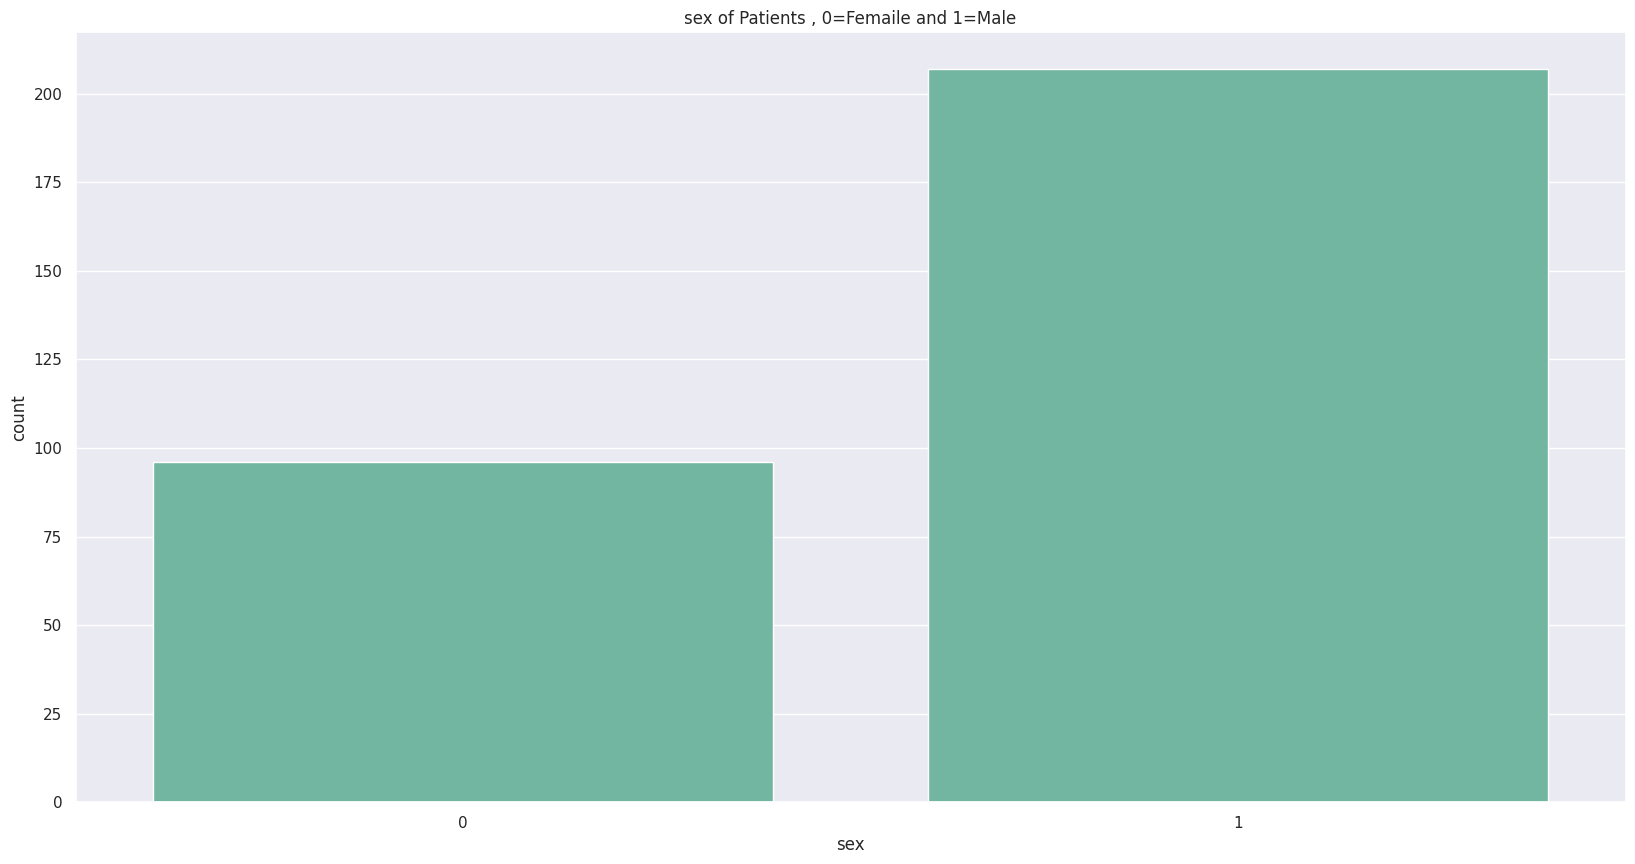

In [152]:
plt.figure(figsize=(20,10))
plt.title("sex of Patients , 0=Femaile and 1=Male")
sns.countplot(x='sex' , data=df )

In [153]:
cp_data = df['cp'].value_counts().reset_index()
cp_data['cp'][3] = 'asymptomatic'
cp_data['cp'][2] = 'non-anginal'
cp_data['cp'][1] = 'Atyppical Anigma'
cp_data['cp'][0] = 'Typical Anigma'
cp_data

<ipython-input-153-c6b4f4dcda6c>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'asymptomatic' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cp_data['cp'][3] = 'asymptomatic'


,cp,count
0,Typical Anigma,143
1,Atyppical Anigma,87
2,non-anginal,50
3,asymptomatic,23


<Axes: title={'center': 'chest pain of patients'}, xlabel='cp', ylabel='count'>

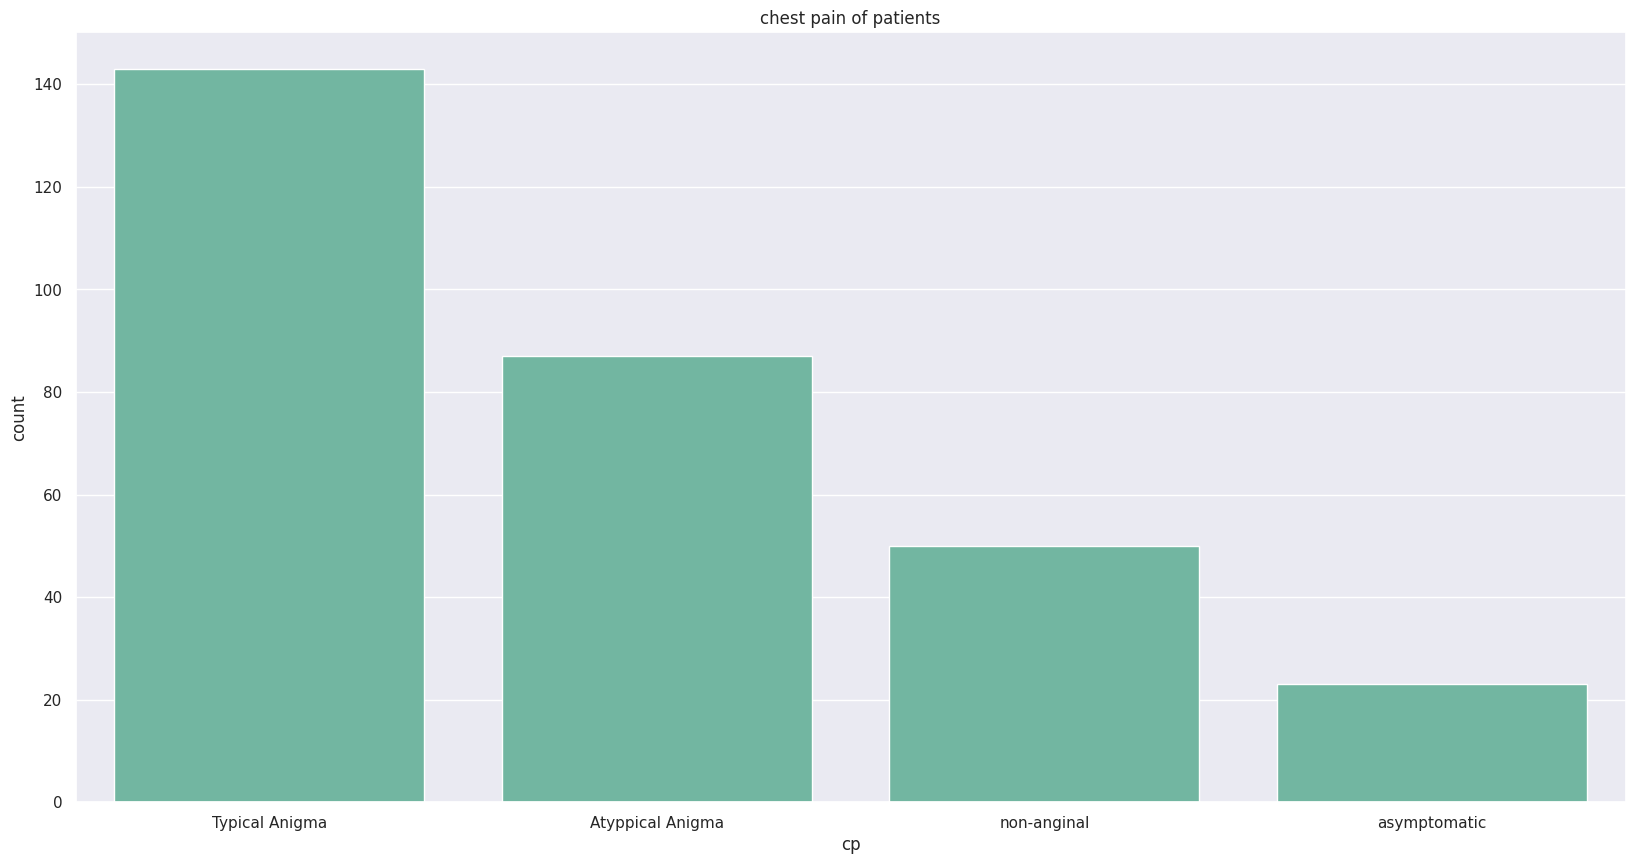

In [154]:
plt.figure(figsize=(20,10))
plt.title("chest pain of patients")

sns.barplot(x=cp_data['cp'] , y = cp_data['count'])

In [155]:
ecg_data = df['restecg'].value_counts().reset_index()
ecg_data['restecg'][0] = 'normal'
ecg_data['restecg'][1] = 'having ST-T wave abnormality'
ecg_data['restecg'][2] = 'showing probable or definite left ventrivular hypertrophy by Estes'
ecg_data

<ipython-input-155-7c13f7975c2e>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'normal' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  ecg_data['restecg'][0] = 'normal'


,restecg,count
0,normal,152
1,having ST-T wave abnormality,147
2,showing probable or definite left ventrivular ...,4


<Axes: title={'center': 'edg data of patients'}, xlabel='restecg', ylabel='count'>

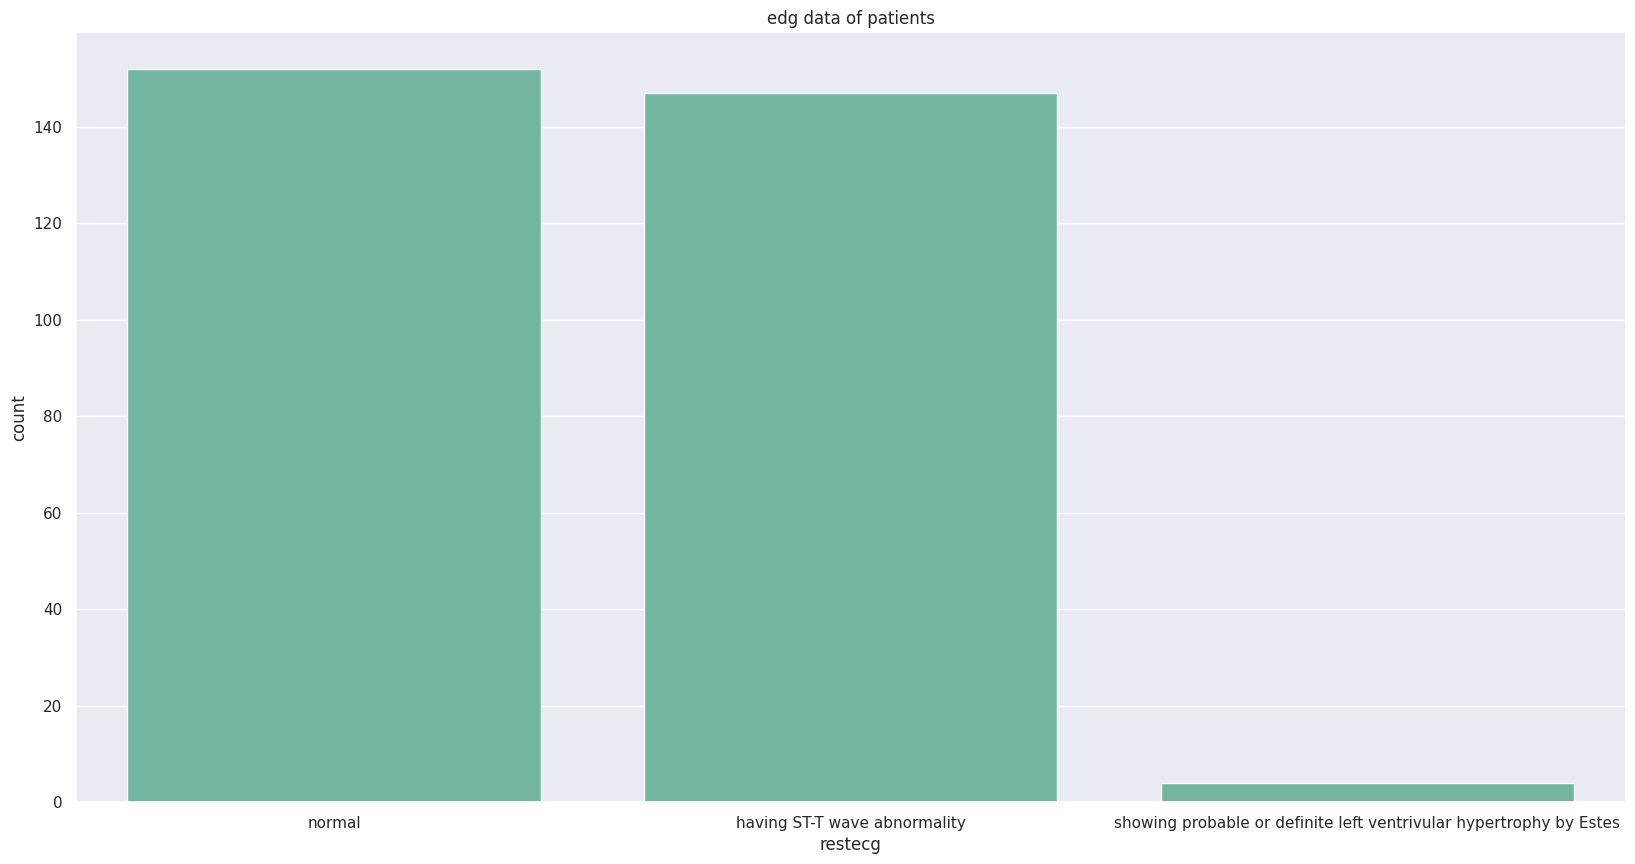

In [156]:
plt.figure(figsize=(20,10))
plt.title("edg data of patients")

sns.barplot(x=ecg_data['restecg'] , y = ecg_data['count'])

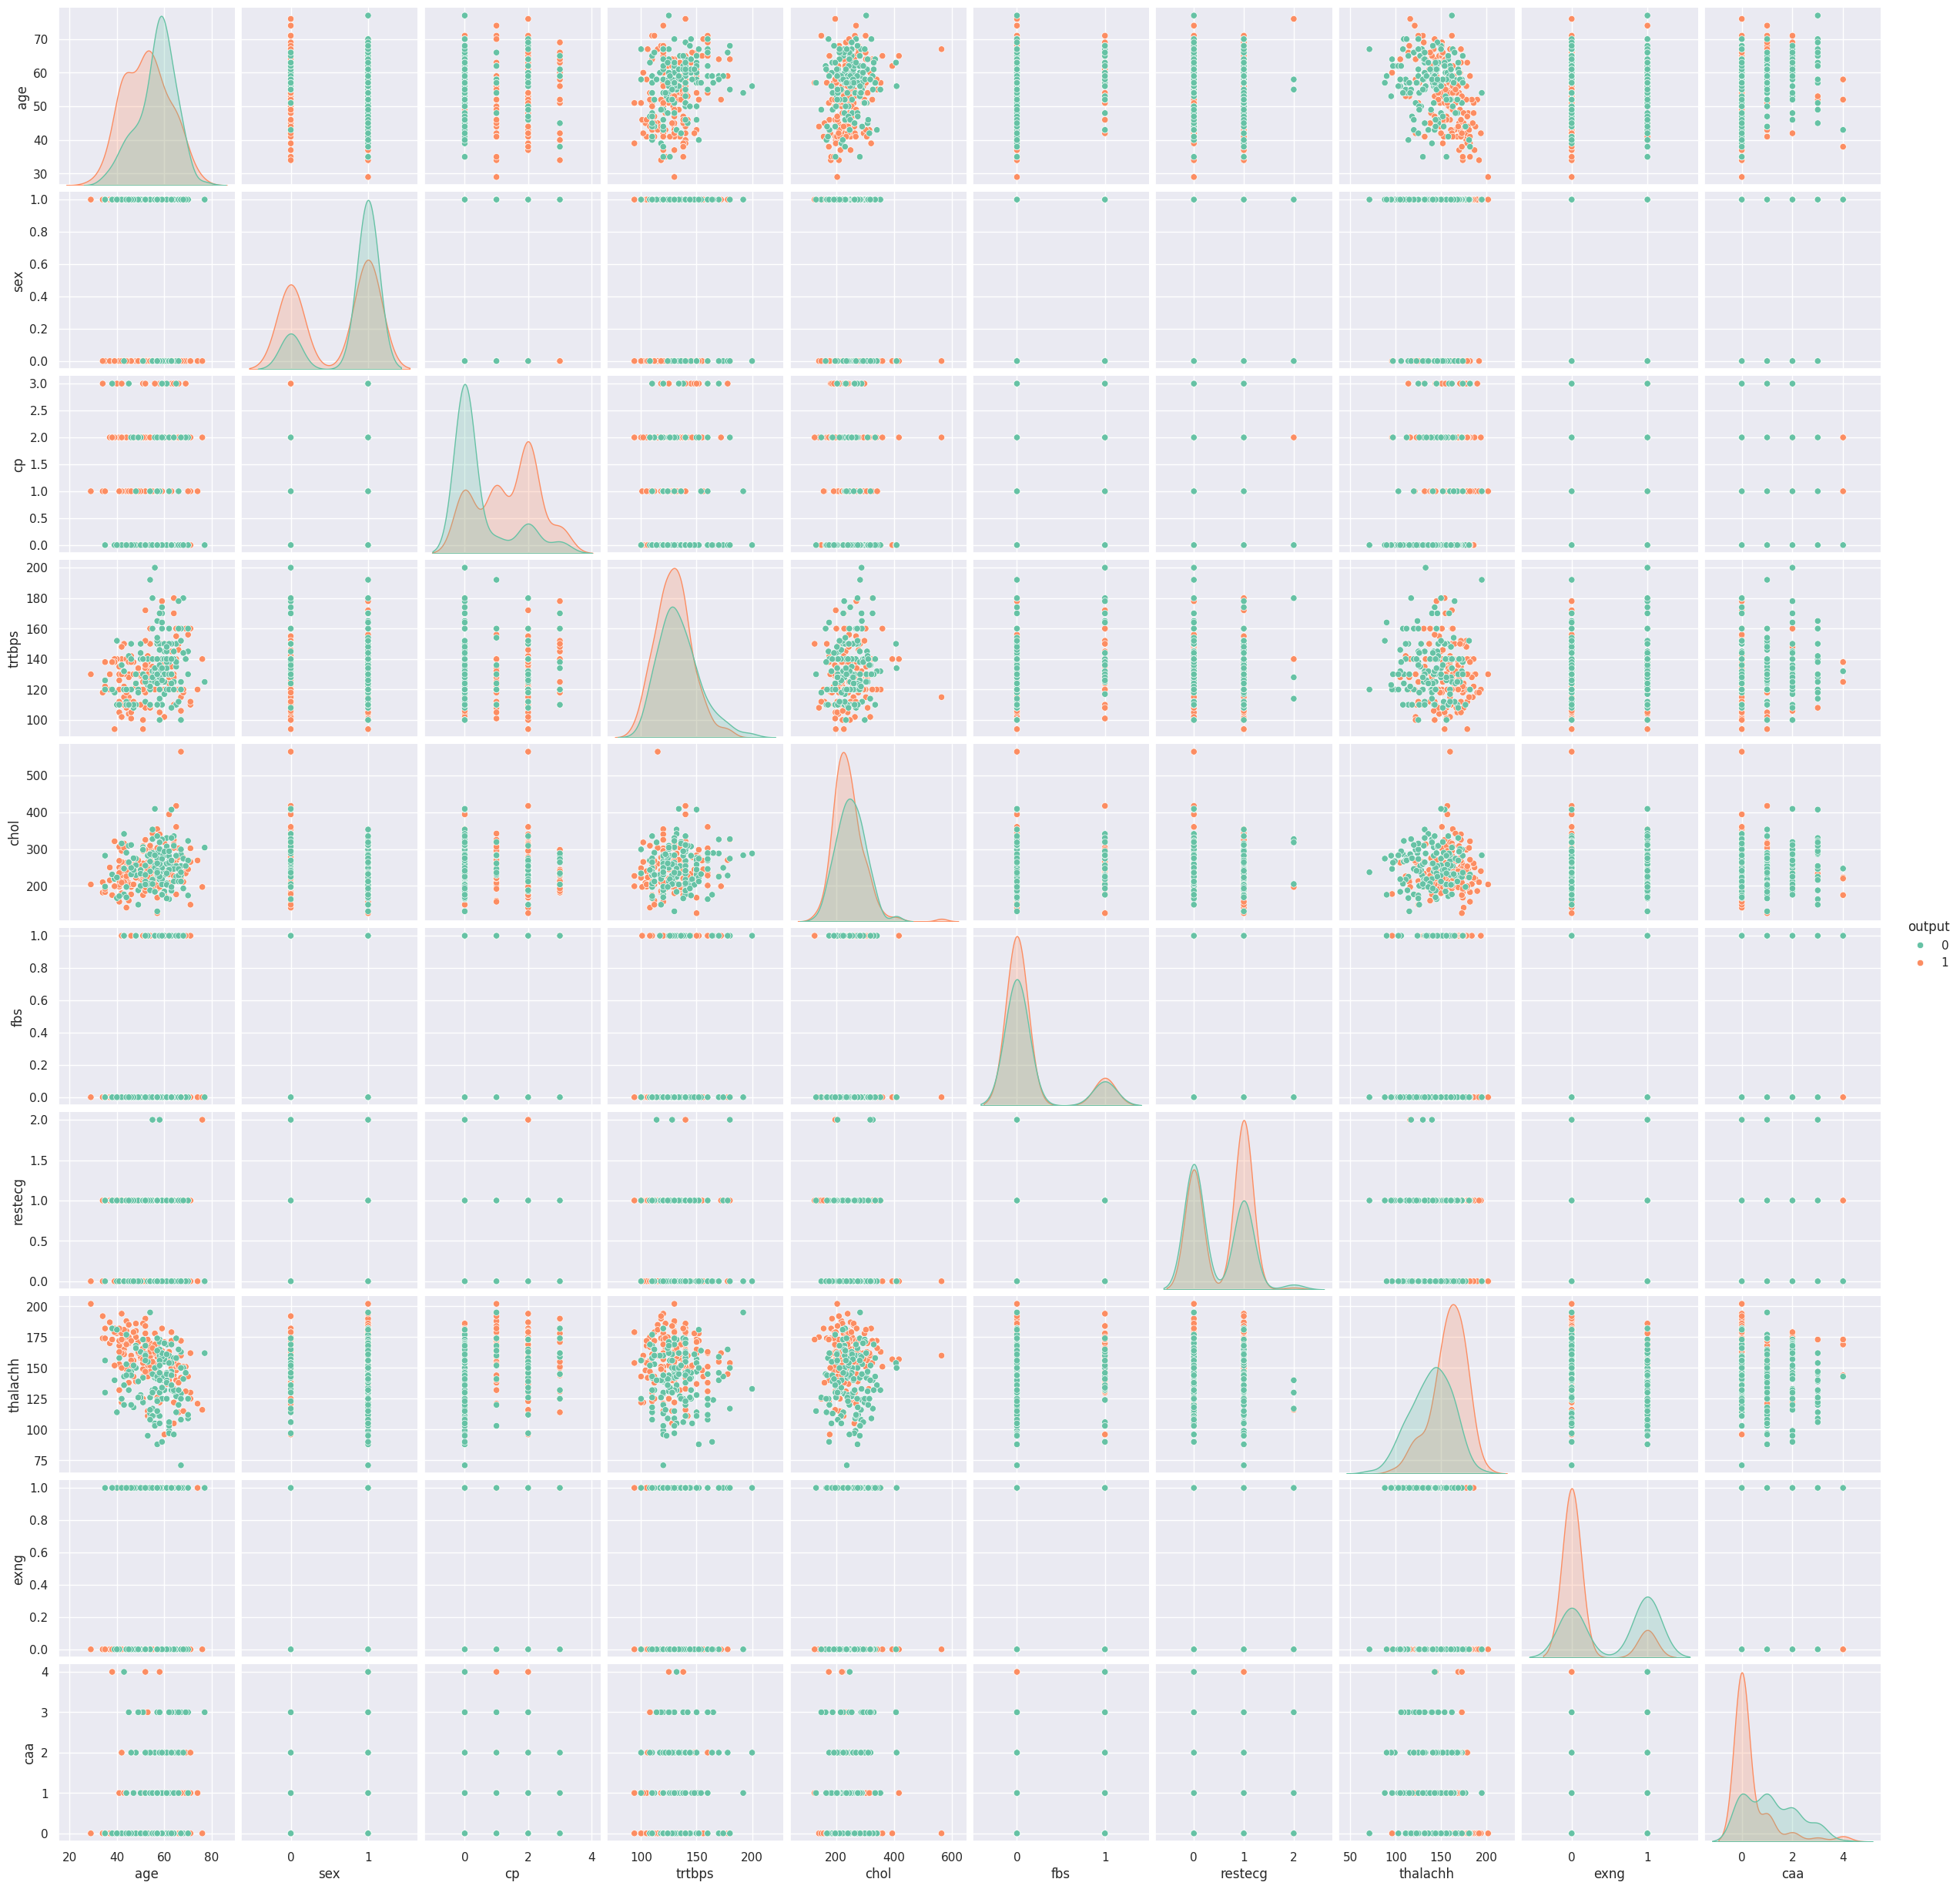

In [157]:
sns.pairplot( hue='output' , data=df)

Text(0.5, 0, 'Maximum Heart Rate Achived (bpm)')

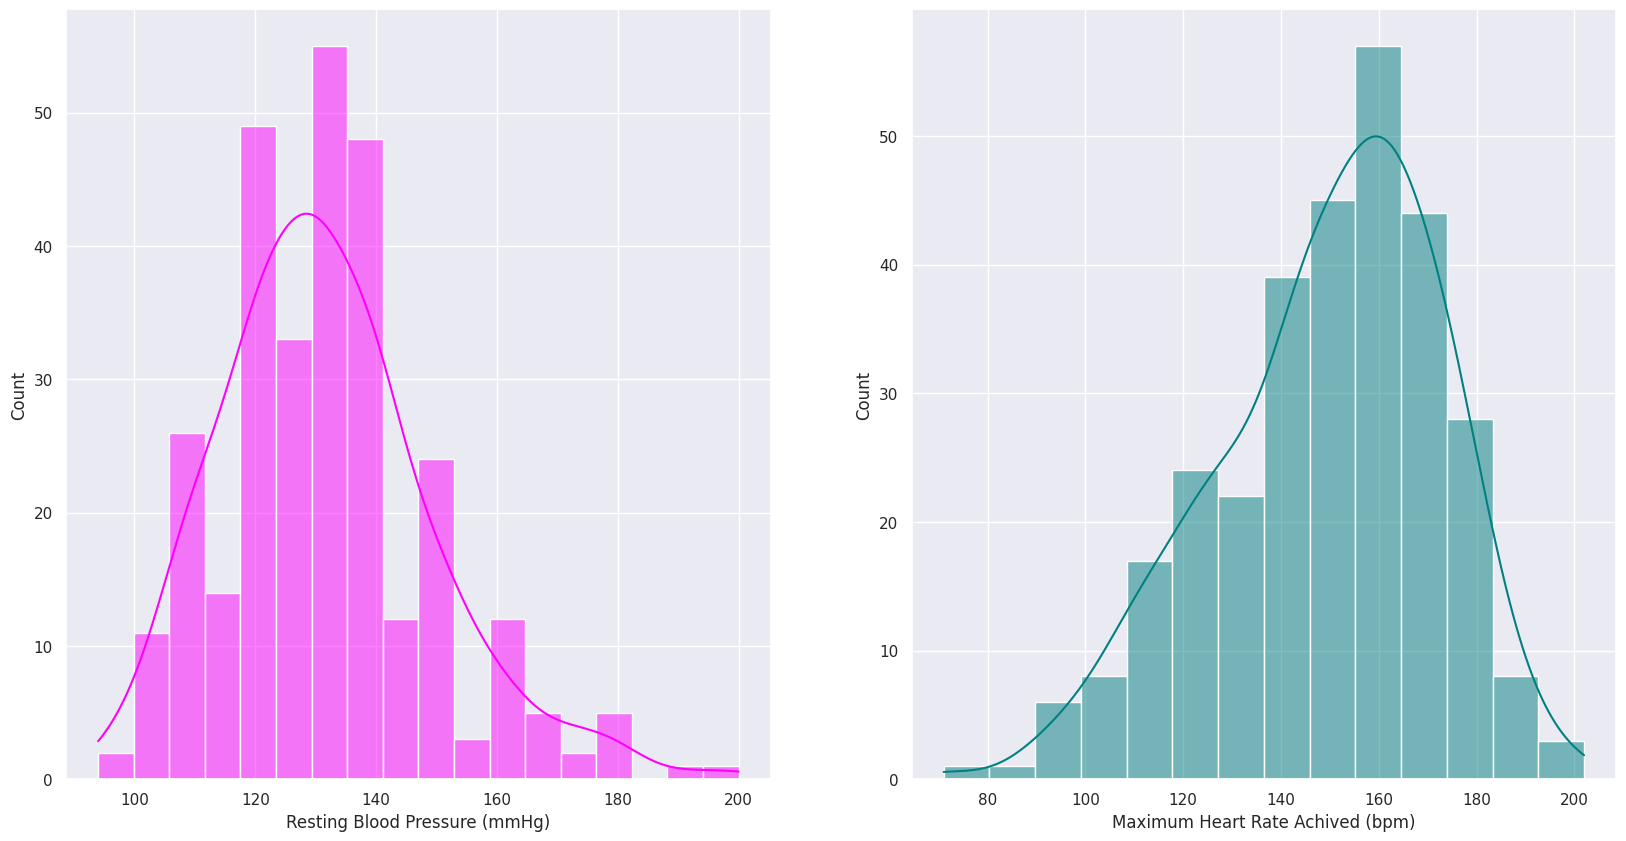

In [158]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.histplot(df['trtbps'] , kde=True , color = 'magenta')
plt.xlabel('Resting Blood Pressure (mmHg)')
plt.subplot(1,2,2)
sns.histplot(df['thalachh'], kde=True, color='teal')
plt.xlabel("Maximum Heart Rate Achived (bpm)")

Text(0.5, 12.44444444444443, 'Cholestrol')

<Figure size 1000x1000 with 0 Axes>

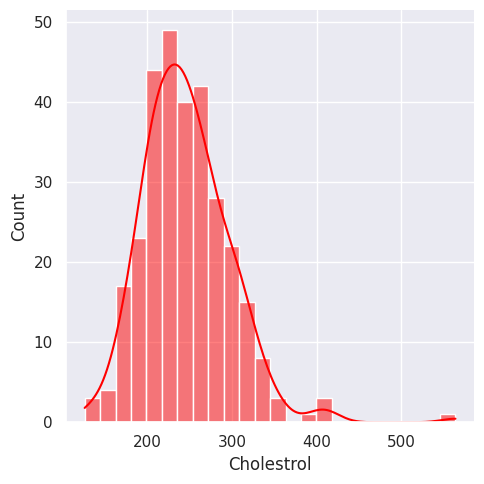

In [159]:
plt.figure(figsize = (10,10))
sns.displot(df['chol'] , kde=True , color ='red')
plt.xlabel("Cholestrol")

In [160]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
0,63,1,3,145,233,1,0,150,0,0,1
1,37,1,2,130,250,0,1,187,0,0,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,0,1
4,57,0,0,120,354,0,1,163,1,0,1


In [161]:
from sklearn.preprocessing import StandardScaler

In [162]:
scale = StandardScaler()

In [163]:
scale.fit(df)

StandardScaler()

In [164]:
df = scale.transform(df)

In [165]:
df = pd.DataFrame(df , columns=['age' , 'sex' , 'cp' , 'trtbps' , 'chol' , 'fbs' , 'restecg' , 'thalachh' ,
                                'exng' , 'caa' , 'output'] )

In [166]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,-0.714429,0.914529
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,-0.714429,0.914529
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,-0.714429,0.914529
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.714429,0.914529
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.714429,0.914529


In [167]:
x = df.iloc[: , :-1]
x

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,-0.714429
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,-0.714429
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,-0.714429
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.714429
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.714429
...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-1.468418,-0.938515,0.478391,-0.101730,-0.417635,0.898962,-1.165281,1.435481,-0.714429
299,-1.033002,0.681005,1.973123,-1.234996,0.342756,-0.417635,0.898962,-0.771706,-0.696631,-0.714429
300,1.503641,0.681005,-0.938515,0.706843,-1.029353,2.394438,0.898962,-0.378132,-0.696631,1.244593
301,0.290464,0.681005,-0.938515,-0.092738,-2.227533,-0.417635,0.898962,-1.515125,1.435481,0.265082


In [168]:
y = df.iloc[: , -1:]
y

,output
0,0.914529
1,0.914529
2,0.914529
3,0.914529
4,0.914529
...,...
298,-1.093459
299,-1.093459
300,-1.093459
301,-1.093459


In [169]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.3 , random_state=101)

In [170]:
from sklearn.linear_model import LogisticRegression

In [5]:
from sklearn.preprocessing import LabelEncoder

In [7]:
lbl = LabelEncoder()

In [173]:
encoded_y = lbl.fit_transform(y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [174]:
logreg = LogisticRegression()
logreg.fit(x_train , encoded_y)

LogisticRegression()

In [175]:
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix

In [176]:
encoded_ytest = lbl.fit_transform(y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [177]:
y_pred1 = logreg.predict(x_test)
lr_conf_matrix = confusion_matrix(encoded_ytest , y_pred1)
lr_acc_score = accuracy_score(encoded_ytest , y_pred1)

In [207]:
lr_acc_score=lr_acc_score*100

In [208]:
print(lr_acc_score , '%')

85.71428571428571 %


In [180]:
from sklearn.tree import DecisionTreeClassifier

In [181]:
tree = DecisionTreeClassifier()

In [182]:
tree.fit(x_train , encoded_y)

DecisionTreeClassifier()

In [183]:
ypred2 = tree.predict(x_test)

In [184]:
encoded_ytest = lbl.fit_transform(y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [185]:
tree_conf_matrix = confusion_matrix(encoded_ytest , ypred2)
tree_acc_score = accuracy_score(encoded_ytest , ypred2)

In [186]:
tree_conf_matrix

array([[26, 18],
       [10, 37]])

In [209]:
tree_acc_score=tree_acc_score*100

In [210]:
print(tree_acc_score , '%')

69.23076923076923 %


In [188]:
from sklearn.neighbors import KNeighborsClassifier

In [189]:
error_rate = []
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train , encoded_y)
  pred = knn.predict(x_test)
  error_rate.append(np.mean(pred != encoded_ytest))


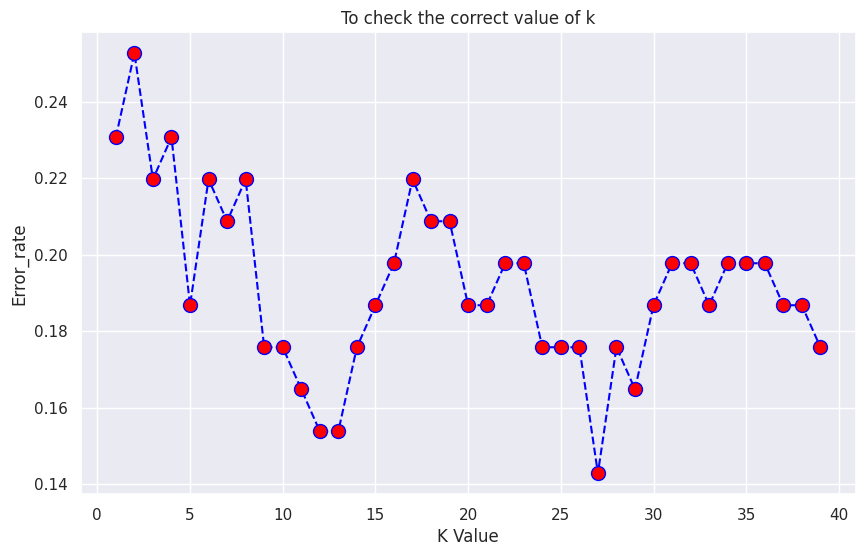

In [190]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40) , error_rate ,color='blue' , linestyle='dashed' , marker='o',
         markerfacecolor = 'red' , markersize=10
         )
plt.xlabel('K Value')
plt.ylabel('Error_rate')
plt.title('To check the correct value of k')
plt.show()

In [191]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(x_train , encoded_y)
ypred4 = knn.predict(x_test)

In [192]:
knn_conf_matrix = confusion_matrix(encoded_ytest , ypred4)
knn_acc_score = accuracy_score(encoded_ytest , ypred4)

In [193]:
knn_conf_matrix

array([[35,  9],
       [ 5, 42]])

In [211]:
knn_acc_score=knn_acc_score *100

In [213]:
print(knn_acc_score  , '%')

84.61538461538461 %


In [214]:
model_acc = pd.DataFrame({'Model' : ['Logistic Regression' , 'Decision Tree' , 'K Nearest Neighbor '] , 'Acurracy' : [lr_acc_score , tree_acc_score , knn_acc_score]})

In [215]:
model_acc = model_acc.sort_values(by=['Acurracy'], ascending=False)

In [216]:
model_acc

,Model,Acurracy
0,Logistic Regression,85.714286
2,K Nearest Neighbor,84.615385
1,Decision Tree,69.230769


In [217]:
from sklearn.model_selection import GridSearchCV

In [218]:
model_acc

,Model,Acurracy
0,Logistic Regression,85.714286
2,K Nearest Neighbor,84.615385
1,Decision Tree,69.230769


In [220]:
param_grid = {
    'solver' : ['newton-cg' , 'lbfgs' , 'liblinear' , 'sag' ,'saga'],
    'penalty' : ['none' , 'l1' , 'l2' , 'elasticnet'],
    'C' : [100 , 10 ,1.5 , 0.1 , 0.01]
}

In [221]:
grid1 = GridSearchCV(LogisticRegression() , param_grid)

In [222]:
grid1.fit(x_train , encoded_y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.5, 0.1, 0.01],
                         'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [223]:
grid1.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

In [224]:
logreg1 = LogisticRegression(C=0.01 , penalty='l2' , solver='liblinear')

In [225]:
logreg1.fit(x_train , encoded_y)

LogisticRegression(C=0.01, solver='liblinear')

In [226]:
logreg_pred = logreg1.predict(x_test)

In [228]:
logreg_pred_conf_matrix = confusion_matrix(encoded_ytest , logreg_pred)
logreg_pred_acc_score = accuracy_score(encoded_ytest , logreg_pred)

In [229]:
logreg_pred_conf_matrix

array([[33, 11],
       [ 6, 41]])

In [230]:
print(logreg_pred_acc_score*100 , '%')

81.31868131868131 %


In [240]:
n_neighbors = range(1,21,2)
weights = ['uniform' , 'distance']
metric = ['euclidean' , 'manhattan' , 'minkowski']

In [241]:
grid = dict(n_neighbors=n_neighbors , weights= weights , metric = metric)

In [242]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [243]:
cv = RepeatedStratifiedKFold(n_splits=10 , n_repeats=3 , random_state=1)

In [248]:
grid_search1 = GridSearchCV(estimator=knn , param_grid=grid , n_jobs=-1 , cv=cv , scoring='accuracy' , error_score=0)

In [249]:
grid_search1.fit(x_train , encoded_y)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0, estimator=KNeighborsClassifier(n_neighbors=12),
             n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(1, 21, 2),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [251]:
grid_search1.best_params_

{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}

In [253]:
knn = KNeighborsClassifier(n_neighbors=12 ,metric= 'manhattan' , weights= 'distance' )
knn.fit(x_train , encoded_y)
knn_pred = knn.predict(x_test)

In [256]:
knn_pred_conf_matrix = confusion_matrix(encoded_ytest , knn_pred)
knn_pred_acc_score = accuracy_score(encoded_ytest , knn_pred)

In [257]:
knn_pred_conf_matrix

array([[33, 11],
       [ 5, 42]])

In [258]:
print(knn_pred_acc_score*100 , '%')

82.41758241758241 %


In [259]:
!pip install evalml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 15.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 5.5 MB/s eta 0:00:00
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 80.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.9/587.9 kB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
df_new = pd.read_csv("/content/heart.csv")
df_new.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
x = df_new.iloc[:,:-1]
x

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [8]:
y =df_new.iloc[:,-1:]
y = lbl.fit_transform(y)
y

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [9]:
import evalml

In [10]:
x_train , x_test , y_train , y_test = evalml.preprocessing.split_data(x,y,problem_type='binary')

In [11]:
evalml.problem_types.ProblemTypes.all_problem_types

[<ProblemTypes.BINARY: 'binary'>,
 <ProblemTypes.MULTICLASS: 'multiclass'>,
 <ProblemTypes.REGRESSION: 'regression'>,
 <ProblemTypes.TIME_SERIES_REGRESSION: 'time series regression'>,
 <ProblemTypes.TIME_SERIES_BINARY: 'time series binary'>,
 <ProblemTypes.TIME_SERIES_MULTICLASS: 'time series multiclass'>,
 <ProblemTypes.MULTISERIES_TIME_SERIES_REGRESSION: 'multiseries time series regression'>]

In [13]:
from evalml.automl import AutoMLSearch
automl = AutoMLSearch(X_train=x_train , y_train=y_train , problem_type='binary')
automl.search()

{1: {'Random Forest Classifier w/ Label Encoder + Imputer + RF Classifier Select From Model': 3.3021137714385986,
  'Total time of batch': 3.4523563385009766},
 2: {'LightGBM Classifier w/ Label Encoder + Imputer + Select Columns Transformer': 1.4053058624267578,
  'Extra Trees Classifier w/ Label Encoder + Imputer + Select Columns Transformer': 2.3171348571777344,
  'Elastic Net Classifier w/ Label Encoder + Imputer + Standard Scaler + Select Columns Transformer': 1.6620616912841797,
  'XGBoost Classifier w/ Label Encoder + Imputer + Select Columns Transformer': 1.427124261856079,
  'Logistic Regression Classifier w/ Label Encoder + Imputer + Standard Scaler + Select Columns Transformer': 4.980554103851318,
  'Total time of batch': 12.44433879852295}}

In [14]:
automl.rankings

,id,pipeline_name,search_order,ranking_score,mean_cv_score,standard_deviation_cv_score,percent_better_than_baseline,high_variance_cv,parameters
0,3,Extra Trees Classifier w/ Label Encoder + Impu...,3,0.413358,0.413358,0.029595,97.476877,False,"{'Label Encoder': {'positive_label': None}, 'I..."
1,2,LightGBM Classifier w/ Label Encoder + Imputer...,2,0.462099,0.462099,0.066745,97.179366,False,"{'Label Encoder': {'positive_label': None}, 'I..."
2,1,Random Forest Classifier w/ Label Encoder + Im...,1,0.466918,0.466918,0.024541,97.149952,False,"{'Label Encoder': {'positive_label': None}, 'I..."
3,6,Logistic Regression Classifier w/ Label Encode...,6,0.469254,0.469254,0.074869,97.135689,False,"{'Label Encoder': {'positive_label': None}, 'I..."
4,4,Elastic Net Classifier w/ Label Encoder + Impu...,4,0.470037,0.470037,0.075389,97.130913,False,"{'Label Encoder': {'positive_label': None}, 'I..."
5,5,XGBoost Classifier w/ Label Encoder + Imputer ...,5,0.499149,0.499149,0.043147,96.953213,False,"{'Label Encoder': {'positive_label': None}, 'I..."
6,0,Mode Baseline Binary Classification Pipeline,0,16.382805,16.382805,0.141301,0.000000,False,"{'Label Encoder': {'positive_label': None}, 'B..."


In [18]:
best_pipeline = automl.best_pipeline

In [17]:
automl.describe_pipeline(automl.rankings.iloc[0]["id"])


**********************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:
**********************************************************************************


* Extra Trees Classifier w/ Label Encoder + Imputer + Select Columns Transformer *


INFO:evalml.pipelines.pipeline_base.describe:* Extra Trees Classifier w/ Label Encoder + Imputer + Select Columns Transformer *


**********************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:**********************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:


Problem Type: binary


INFO:evalml.pipelines.pipeline_base.describe:Problem Type: binary


Model Family: Extra Trees


INFO:evalml.pipelines.pipeline_base.describe:Model Family: Extra Trees


INFO:evalml.pipelines.pipeline_base.describe:


Pipeline Steps


INFO:evalml.pipelines.pipeline_base.describe:Pipeline Steps


INFO:evalml.pipelines.pipeline_base.describe:==============


1. Label Encoder


INFO:evalml.pipelines.component_graph.describe:1. Label Encoder


	 * positive_label : None


INFO:evalml.pipelines.components.component_base.describe:	 * positive_label : None


2. Imputer


INFO:evalml.pipelines.component_graph.describe:2. Imputer


	 * categorical_impute_strategy : most_frequent


INFO:evalml.pipelines.components.component_base.describe:	 * categorical_impute_strategy : most_frequent


	 * numeric_impute_strategy : mean


INFO:evalml.pipelines.components.component_base.describe:	 * numeric_impute_strategy : mean


	 * boolean_impute_strategy : most_frequent


INFO:evalml.pipelines.components.component_base.describe:	 * boolean_impute_strategy : most_frequent


	 * categorical_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * categorical_fill_value : None


	 * numeric_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * numeric_fill_value : None


	 * boolean_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * boolean_fill_value : None


3. Select Columns Transformer


INFO:evalml.pipelines.component_graph.describe:3. Select Columns Transformer


	 * columns : ['age', 'cp', 'thalachh', 'exng', 'oldpeak', 'caa', 'thall']


INFO:evalml.pipelines.components.component_base.describe:	 * columns : ['age', 'cp', 'thalachh', 'exng', 'oldpeak', 'caa', 'thall']


4. Extra Trees Classifier


INFO:evalml.pipelines.component_graph.describe:4. Extra Trees Classifier


	 * n_estimators : 100


INFO:evalml.pipelines.components.component_base.describe:	 * n_estimators : 100


	 * max_features : sqrt


INFO:evalml.pipelines.components.component_base.describe:	 * max_features : sqrt


	 * max_depth : 6


INFO:evalml.pipelines.components.component_base.describe:	 * max_depth : 6


	 * min_samples_split : 2


INFO:evalml.pipelines.components.component_base.describe:	 * min_samples_split : 2


	 * min_weight_fraction_leaf : 0.0


INFO:evalml.pipelines.components.component_base.describe:	 * min_weight_fraction_leaf : 0.0


	 * n_jobs : -1


INFO:evalml.pipelines.components.component_base.describe:	 * n_jobs : -1


INFO:evalml.automl.automl_search.describe_pipeline:


Training


INFO:evalml.automl.automl_search.describe_pipeline:Training


INFO:evalml.automl.automl_search.describe_pipeline:========


Training for binary problems.


INFO:evalml.automl.automl_search.describe_pipeline:Training for binary problems.


Total training time (including CV): 2.3 seconds


INFO:evalml.automl.automl_search.describe_pipeline:Total training time (including CV): 2.3 seconds


INFO:evalml.automl.automl_search.describe_pipeline:


Cross Validation


INFO:evalml.automl.automl_search.describe_pipeline:Cross Validation


----------------


INFO:evalml.automl.automl_search.describe_pipeline:----------------


             Log Loss Binary  MCC Binary  Gini   AUC  Precision    F1  Balanced Accuracy Binary  Accuracy Binary # Training # Validation
0                      0.380       0.604 0.844 0.922      0.839 0.765                     0.795            0.802        161           81
1                      0.424       0.604 0.776 0.888      0.839 0.765                     0.795            0.802        161           81
2                      0.436       0.597 0.746 0.873      0.833 0.758                     0.790            0.800        162           80
mean                   0.413       0.601 0.789 0.894      0.837 0.762                     0.793            0.802          -            -
std                    0.030       0.004 0.050 0.025      0.003 0.004                     0.002            0.001          -            -
coef of var            0.072       0.007 0.063 0.028      0.004 0.005                     0.003            0.002          -            -


INFO:evalml.automl.automl_search.describe_pipeline:             Log Loss Binary  MCC Binary  Gini   AUC  Precision    F1  Balanced Accuracy Binary  Accuracy Binary # Training # Validation
0                      0.380       0.604 0.844 0.922      0.839 0.765                     0.795            0.802        161           81
1                      0.424       0.604 0.776 0.888      0.839 0.765                     0.795            0.802        161           81
2                      0.436       0.597 0.746 0.873      0.833 0.758                     0.790            0.800        162           80
mean                   0.413       0.601 0.789 0.894      0.837 0.762                     0.793            0.802          -            -
std                    0.030       0.004 0.050 0.025      0.003 0.004                     0.002            0.001          -            -
coef of var            0.072       0.007 0.063 0.028      0.004 0.005                     0.003            0.002          -    

In [19]:
best_pipeline.score(x_test , y_test , objectives=['auc' , 'f1' , 'Precision' , 'Recall'])

OrderedDict([('AUC', 0.8701298701298702),
             ('F1', 0.7812499999999999),
             ('Precision', 0.8064516129032258),
             ('Recall', 0.7575757575757576)])

In [21]:
automl_auc = AutoMLSearch(X_train = x_train , y_train=y_train,
                          problem_type='binary',
                          objective='auc',
                          additional_objectives=['f1' , 'precision'],
                          max_batches=1,
                          optimize_thresholds=True
                          )
automl_auc.search()

{1: {'Random Forest Classifier w/ Label Encoder + Imputer + RF Classifier Select From Model': 2.9992973804473877,
  'Total time of batch': 3.132079601287842}}

In [22]:
automl_auc.rankings

,id,pipeline_name,search_order,ranking_score,mean_cv_score,standard_deviation_cv_score,percent_better_than_baseline,high_variance_cv,parameters
0,1,Random Forest Classifier w/ Label Encoder + Im...,1,0.856243,0.856243,0.014743,35.624261,False,"{'Label Encoder': {'positive_label': None}, 'I..."
1,0,Mode Baseline Binary Classification Pipeline,0,0.500000,0.500000,0.000000,0.000000,False,"{'Label Encoder': {'positive_label': None}, 'B..."


In [23]:
best_pipeline_auc = automl_auc.best_pipeline

In [25]:
best_pipeline_auc.score(x_test , y_test , objectives=['auc'])

OrderedDict([('AUC', 0.8354978354978355)])

In [26]:
best_pipeline.save('model.pkl')


In [27]:
final_model = automl.load('model.pkl')
final_model.predict_proba(x_test)

,0,1
24,0.476206,0.523794
67,0.111968,0.888032
13,0.292056,0.707944
112,0.384836,0.615164
80,0.045754,0.954246
...,...,...
160,0.131567,0.868433
234,0.596474,0.403526
110,0.655146,0.344854
190,0.892123,0.107877
